In [1]:
import pandas as pd
import seaborn as sns

#### Data Preprocessing

In [2]:
df = pd.read_csv("./data/train_data.csv")
df

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0
1,51327,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
2,48672,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
3,380530,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
4,78318,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,570796,2007,1928,24,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4120,307079,2015,644,22,terraced,individual_heating,management_in_trust,102.0,400.0,0~5min,5min~10min,5.0,10.0,Daegu,7,7.0,11.0
4121,357522,2007,868,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4122,312389,1978,1327,1,corridor,individual_heating,self_management,87.0,0.0,0~5min,0-5min,1.0,4.0,Kyungbuk_uni_hospital,3,7.0,11.0


In [3]:
def timestr_to_number(string):
    if string in ["0-5min", "0~5min"]:
        return 5
    elif string in ["5min-10min", "5min~10min"]:
        return 10
    elif string in ["10min-15min", "10min~15min"]:
        return 15
    elif string in ["15min-20min", "15min~20min"]:
        return 20
    elif string in "no_bus_stop_nearby":
        return 30

preprocessed = df.copy()
preprocessed["TimeToBusStop"] = preprocessed["TimeToBusStop"].apply(timestr_to_number)
preprocessed["TimeToSubway"] = preprocessed["TimeToSubway"].apply(timestr_to_number)

preprocessed["HeatingType"].apply(lambda x: int(x == "central_heating"))
preprocessed["AptManageType"].apply(lambda x: int(x == "management_in_trust"))

cat_cols = ["HallwayType", "SubwayStation"]
categorical = pd.get_dummies(preprocessed[cat_cols])
categorical["HeatingType"] = preprocessed["HeatingType"].apply(lambda x: int(x == "central_heating"))
categorical["AptManageType"] = preprocessed["AptManageType"].apply(lambda x: int(x == "management_in_trust"))
numerical = preprocessed.drop(cat_cols, axis=1)
numerical = numerical.drop(["HeatingType", "AptManageType"], axis=1)

categorical

,HallwayType_corridor,HallwayType_mixed,HallwayType_terraced,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby,HeatingType,AptManageType
0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0,0,1
4,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,0,0,1,0,0,0,0,1,0,0,0,0,1
4120,0,0,1,0,0,0,1,0,0,0,0,0,1
4121,0,0,1,0,0,0,0,1,0,0,0,0,1
4122,1,0,0,0,0,0,0,1,0,0,0,0,0


In [4]:
train_cat = categorical.sample(frac=0.8, random_state=213)
test_cat = categorical.drop(train_cat.index)
valid_cat = train_cat.sample(frac=0.25, random_state=123)
train_cat = train_cat.drop(valid_cat.index)

train_num = numerical.sample(frac=0.8, random_state=213)
test_num = numerical.drop(train_num.index)
valid_num = train_num.sample(frac=0.25, random_state=123)
train_num = train_num.drop(valid_num.index)

mean_value = train_num.mean()
std_value = train_num.std()
min_value = train_num.min()
max_value = train_num.max()

# standard scaling
train_num = (train_num - mean_value) / std_value
valid_num = (valid_num - mean_value) / std_value
test_num = (test_num - mean_value) / std_value

# min max

# train_num = (train_num - min_value) / (max_value - min_value)
# valid_num = (valid_num - min_value) / (max_value - min_value)
# test_num = (test_num - min_value) / (max_value - min_value)

train_num

,SalePrice,YearBuilt,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
3896,3.417701,0.453956,2.501067,2.533424,-0.892673,1.700810,-0.547503,-0.825391,2.371371,0.631640,1.770908,-0.243977,-0.183079
1408,-0.269258,0.339798,-0.138367,-0.923072,-0.380354,-0.952073,1.647833,0.637372,-1.028044,-1.436932,-0.355488,-1.124287,-0.409660
2556,0.431429,0.453956,-0.247263,-1.188956,-0.892673,1.700810,-0.547503,-0.825391,2.371371,0.631640,1.770908,-0.243977,-0.183079
1891,-0.273433,0.682272,-0.138367,-0.524246,-0.777285,-0.905660,-0.547503,2.831518,-1.337082,-0.790504,-0.355488,-1.124287,-1.315987
1177,-0.202531,0.339798,-0.138367,1.071060,-0.380354,-0.952073,1.647833,0.637372,-1.028044,-1.436932,-0.355488,-1.124287,-0.409660
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,-0.310967,-1.144257,-0.127996,-1.321899,1.521225,-0.092206,-0.547503,1.368754,0.517145,1.148783,-0.780767,1.223206,1.402993
2738,0.873535,0.453956,1.181350,-0.391303,1.664305,-0.121520,-0.547503,-0.825391,-0.409968,-0.144075,-0.780767,-0.243977,-0.636242
789,-1.015830,-0.687625,-0.127996,-0.258361,-0.514203,-1.264751,1.647833,1.368754,-1.337082,-0.919789,-0.355488,0.929770,-0.862823
2649,0.523191,0.453956,-0.247263,-0.790130,-0.892673,1.700810,-0.547503,-0.825391,2.371371,0.631640,1.770908,-0.243977,-0.183079


#### Data analysis

In [5]:
sns.set(rc={'figure.figsize':(16, 6)})
sns.set(font_scale=0.7)

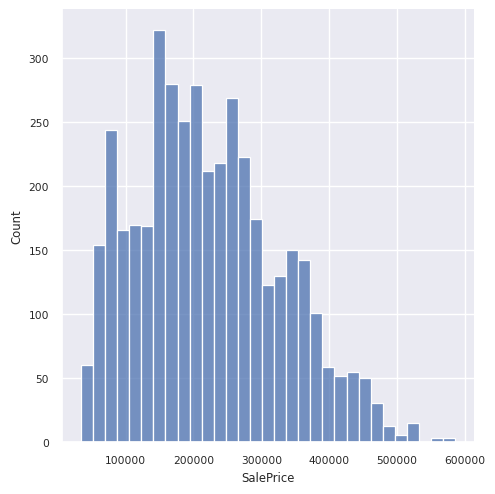

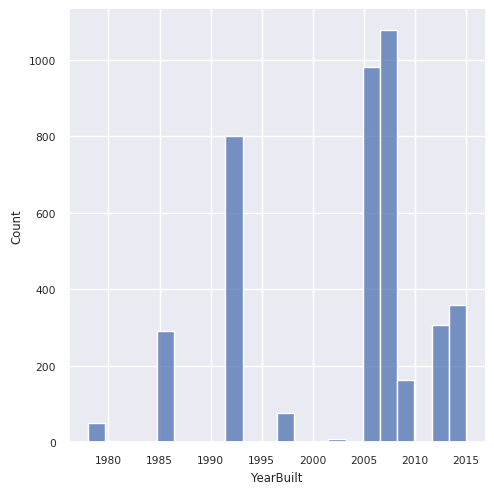

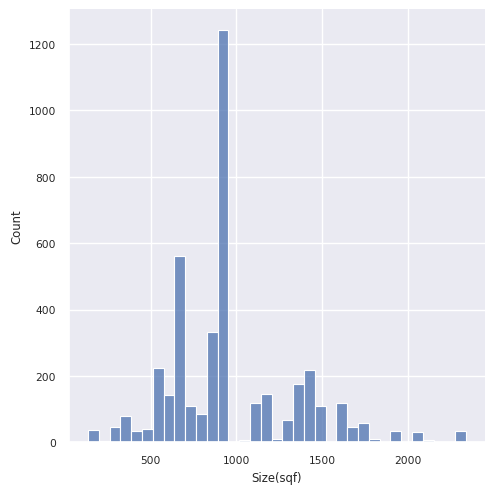

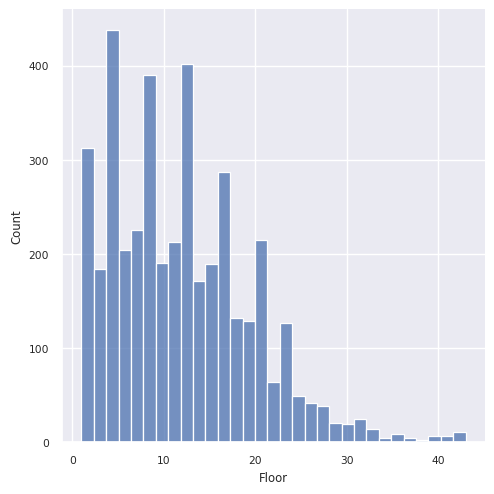

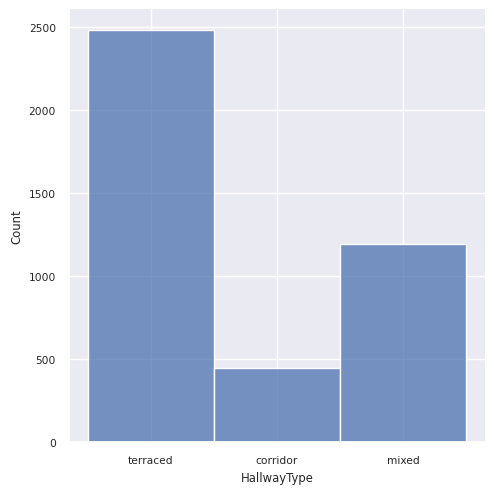

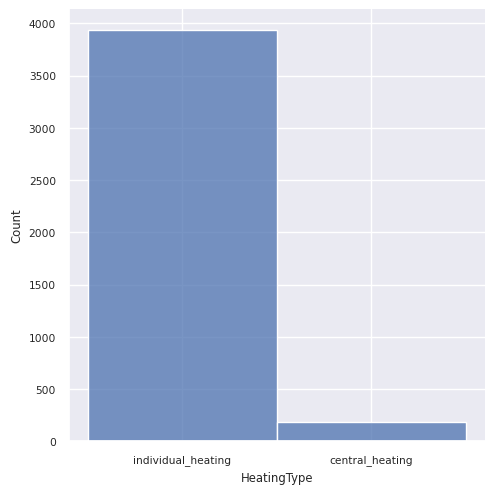

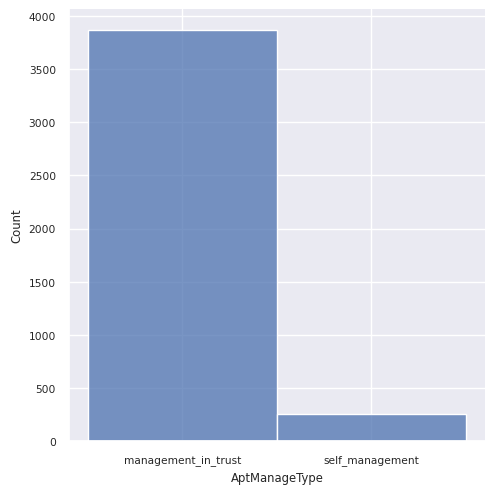

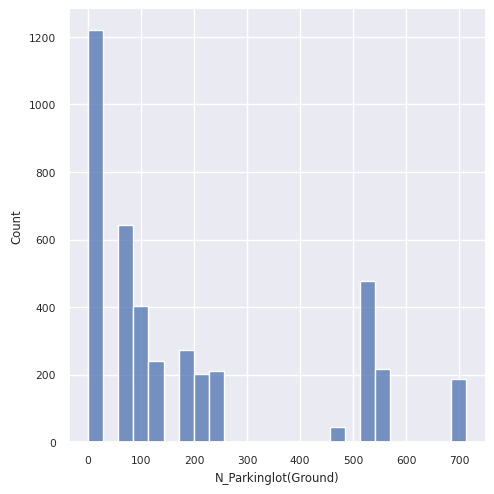

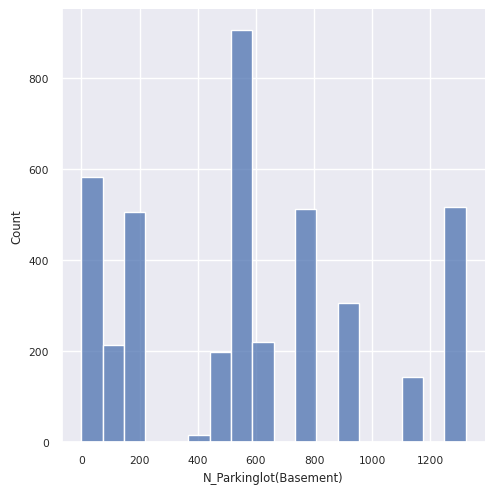

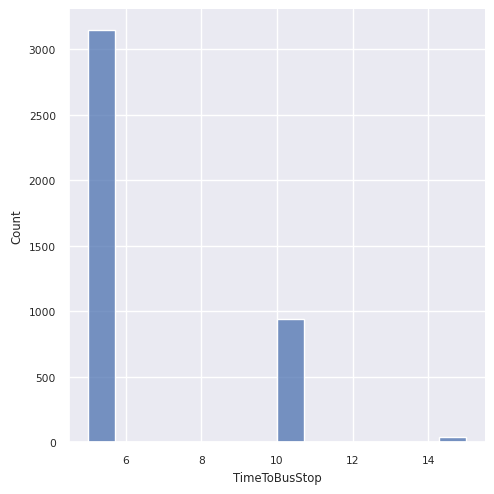

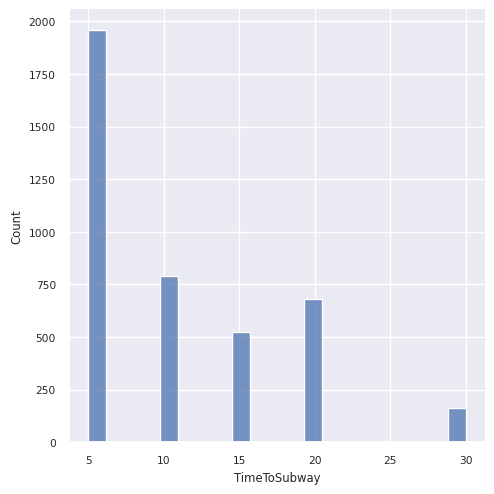

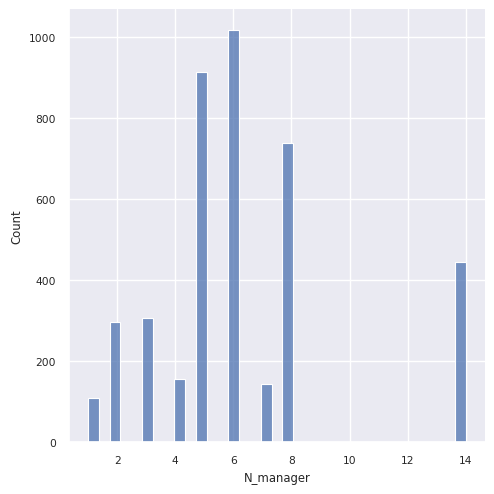

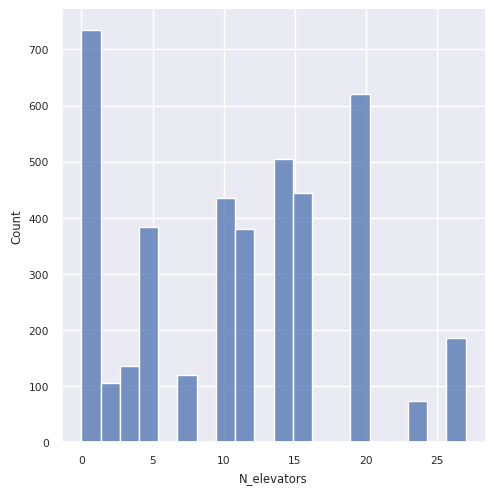

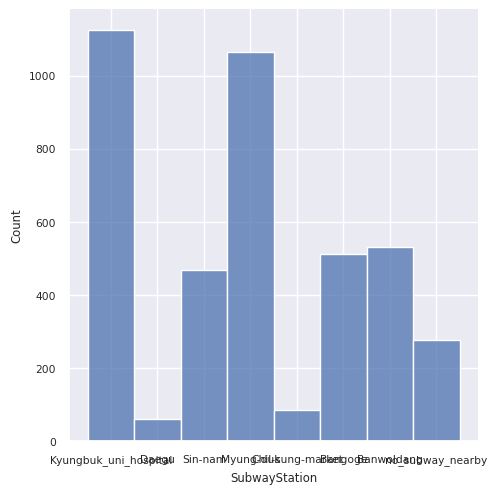

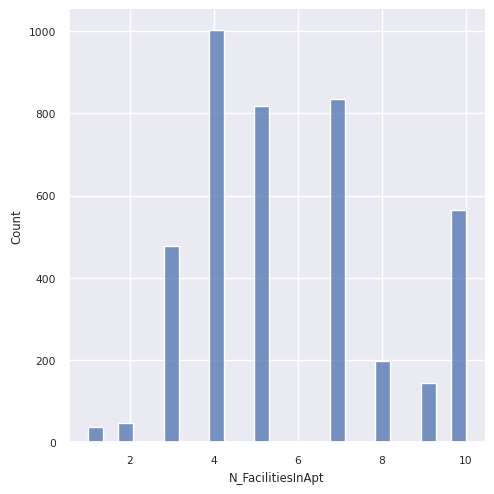

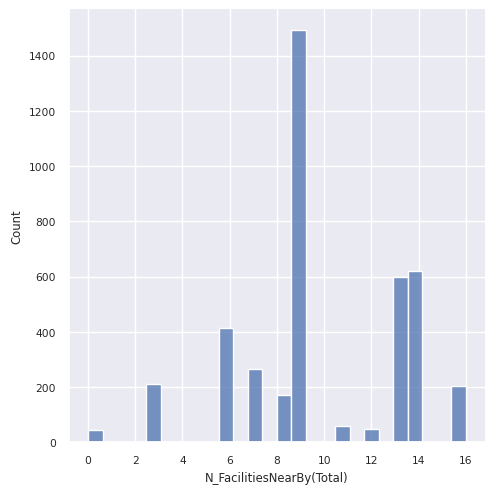

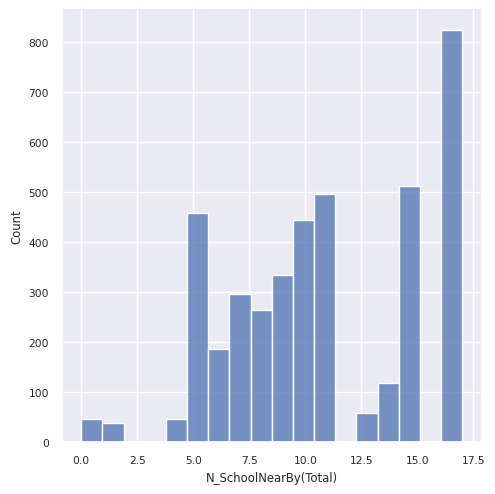

In [6]:
for column in preprocessed.columns:
    sns.displot(x=preprocessed[column])

In [7]:
corr = numerical.corr()
corr.style.background_gradient(cmap='coolwarm')

,SalePrice,YearBuilt,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
SalePrice,1.000000,0.464076,0.693545,0.331014,-0.146647,0.481596,-0.252242,-0.449990,0.360324,0.203857,0.509874,-0.421905,-0.378565
YearBuilt,0.464076,1.000000,0.035930,0.252329,-0.525296,0.578179,-0.030063,-0.471918,0.096074,-0.183503,0.589429,-0.415147,-0.307838
Size(sqf),0.693545,0.035930,1.000000,0.179384,0.177012,0.185165,-0.318377,-0.167846,0.284511,0.240307,0.142617,-0.265129,-0.274180
Floor,0.331014,0.252329,0.179384,1.000000,-0.102984,0.324715,-0.117155,-0.208357,0.249085,0.032863,0.267542,-0.080072,-0.046518
N_Parkinglot(Ground),-0.146647,-0.525296,0.177012,-0.102984,1.000000,-0.373268,-0.121785,0.303518,0.027874,0.553496,-0.432389,0.127498,0.095235
N_Parkinglot(Basement),0.481596,0.578179,0.185165,0.324715,-0.373268,1.000000,-0.409320,-0.493825,0.719644,0.214240,0.834618,0.046104,0.145188
TimeToBusStop,-0.252242,-0.030063,-0.318377,-0.117155,-0.121785,-0.409320,1.000000,0.111196,-0.313187,-0.139105,-0.215769,-0.076460,-0.061862
TimeToSubway,-0.449990,-0.471918,-0.167846,-0.208357,0.303518,-0.493825,0.111196,1.000000,-0.256285,0.018868,-0.474957,0.286921,0.208894
N_manager,0.360324,0.096074,0.284511,0.249085,0.027874,0.719644,-0.313187,-0.256285,1.000000,0.557735,0.644404,0.134889,0.168151
N_elevators,0.203857,-0.183503,0.240307,0.032863,0.553496,0.214240,-0.139105,0.018868,0.557735,1.000000,0.178943,0.042116,0.083271


Both N_FacilitiesInApt and N_Parkinglot(Basement), as well as N_FacilitiesNearBy(Total) and N_SchoolNearBy(Total) have high correlation. Deleting one column from each or one of pairs might simplify learning process. This can result in better predictions. (Actually, that didn't help)  

#### Dataloaders

In [8]:
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim
from typing import Callable

In [9]:
train_dataset = data.TensorDataset(torch.from_numpy(train_num.values[:,1:]), torch.from_numpy(train_cat.values), torch.from_numpy(train_num.values[:,0]))
valid_dataset = data.TensorDataset(torch.from_numpy(valid_num.values[:,1:]), torch.from_numpy(valid_cat.values), torch.from_numpy(valid_num.values[:,0]))
test_dataset = data.TensorDataset(torch.from_numpy(test_num.values[:,1:]), torch.from_numpy(test_cat.values), torch.from_numpy(test_num.values[:,0]))

BATCH_SIZE = 128

train_dl = data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
valid_dl = data.DataLoader(valid_dataset, batch_size=BATCH_SIZE)
test_dl = data.DataLoader(test_dataset, batch_size=BATCH_SIZE)


#### Model definition

In [10]:
EMBEDDING_SIZE = 10

class HousePricePredictor(nn.Module):
    def __init__(self, categorical_in, numerical_in) -> None:
        super().__init__()
        self.embedding_layer1 = nn.Linear(in_features=categorical_in, out_features=EMBEDDING_SIZE)
        self.embedding_bn = nn.BatchNorm1d(EMBEDDING_SIZE)
        self.embedding_activation = nn.Tanh()

        self.linear1 = nn.Linear(in_features=EMBEDDING_SIZE+numerical_in, out_features=2048)
        self.bn1 = nn.BatchNorm1d(2048)
        self.activation1 = nn.ReLU()

        self.linear2 = nn.Linear(in_features=2048, out_features=1024)
        self.bn2 = nn.BatchNorm1d(1024)
        self.activation2 = nn.ReLU()

        # self.linear3 = nn.Linear(in_features=2048, out_features=2048)
        # self.bn3 = nn.BatchNorm1d(2048)
        # self.activation3 = nn.ReLU()

        self.output = nn.Linear(in_features=1024, out_features=1)

    def forward(self, x, categorical_x):
        out = self.embedding_layer1(categorical_x)
        out = self.embedding_bn(out)
        out = self.embedding_activation(out)

        out = self.linear1(torch.cat([out, x], dim=1))
        out = self.bn1(out)
        out = self.activation1(out)

        out = self.linear2(out)
        out = self.bn2(out)
        out = self.activation2(out)

        # out = self.linear3(out)
        # out = self.bn3(out)
        # out = self.activation3(out)

        return self.output(out)

#### Magic lines

In [11]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available(): 
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
    
# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

#### Trainer definition

In [12]:
class Trainer:
    """
    Class responsible for training the model
    """

    def __init__(
            self,
            model: nn.Module,
            optim: torch.optim.Optimizer,
            loss: Callable,
            train_dataloader: data.DataLoader,
            valid_dataloader: data.DataLoader,
            test_dataloader: data.DataLoader,
            metric: Callable,
            verbose: bool = True
        ):
        self.device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
        self.model = model.to(self.device)
        self.optim = optim
        self.loss = loss
        self.train_dataloader = train_dataloader
        self.valid_dataloader = valid_dataloader
        self.test_dataloader = test_dataloader
        self.metric = metric
        self.verbose = verbose
        self.history: list[tuple[float, float, float, float]] = []


    def evaluate(self, eval_dataloader: data.DataLoader) -> float:
        """
        Evaluates the model on given dataset
        """
        losses = []
        metric_scores = []
        self.model.eval()
        with torch.no_grad():
            for num_features, cat_features, labels in eval_dataloader:
                num_features = num_features.to(self.device)
                cat_features = cat_features.to(self.device)
                labels = labels.to(self.device)
                
                predictions = self.model(num_features.float(), cat_features.float()).squeeze(dim=1)

                loss = self.loss(predictions, labels.float())
                losses.append(loss.item())
                metric_scores.append(self.metric(predictions, labels))
        return sum(losses) / len(losses), sum(metric_scores) / len(metric_scores)

    
    def train_one_epoch(self) -> None:
        """
        Trains one epoch
        """
        losses = []
        metric_scores = []
        self.model.train()
        for num_features, cat_features, labels in self.train_dataloader:
            num_features = num_features.to(self.device)
            cat_features = cat_features.to(self.device)
            labels = labels.to(self.device)

            predictions = self.model(num_features.float(), cat_features.float()).squeeze(dim=1)

            loss = self.loss(predictions, labels.float())

            self.optim.zero_grad()

            loss.backward()

            self.optim.step()

            losses.append(loss.item())
            metric_scores.append(self.metric(predictions, labels))
        self.history.append(
            (sum(losses)/len(losses), sum(metric_scores)/len(metric_scores), *self.evaluate(self.valid_dataloader))
        )
    
    def train(self, epochs: int, early_stoping: int = 0) -> None:
        """
        Trains model
        """
        min_loss = None
        without_progress = 0
        try:
            for epoch in range(epochs):
                self.train_one_epoch()
                if self.verbose is True:
                    train_loss, train_metric, valid_loss, valid_metric = self.history[-1]
                    print(
                        f"Epoch: {epoch}\t Train loss: {train_loss:.4}\t accuracy: {train_metric:.4}\t Validation loss: {valid_loss:.4}\t accuracy: {valid_metric:.4}"
                    )
                if early_stoping > 0:
                    _, _, valid_loss, _ = self.history[-1]
                    if min_loss is None:
                        min_loss = valid_loss
                    elif min_loss > valid_loss:
                        min_loss = valid_loss
                        without_progress = 0
                    else:
                        without_progress += 1
                    
                    if without_progress >= early_stoping:
                        break
        except KeyboardInterrupt:
            pass

        if self.verbose is True:
            test_loss, test_accuracy = self.evaluate(self.test_dataloader)
            print(f"Test loss: {test_loss:.4}\t accuracy: {test_accuracy:.4}")


#### Accuracy definition for this task

In [13]:
# Values 140 000 and 310 000 (instead of 100 000 and 350 000) chosen empirically
def classification_accuracy(predictions, labels, first_limit=140000, second_limit=310000):
    mean = mean_value["SalePrice"]
    std = std_value["SalePrice"]
    below100 = torch.sum((predictions<=(first_limit-mean)/std).logical_and(labels<=(100000-mean)/std)) / torch.sum(labels<=(100000-mean)/std)
    between100and350 = torch.sum((predictions<=(second_limit-mean)/std).logical_and(predictions>(first_limit-mean)/std).logical_and(labels<=(350000-mean)/std).logical_and(labels>(100000-mean)/std)) / torch.sum((labels>(100000-mean)/std).logical_and(labels<=(350000-mean)/std))
    above350 = torch.sum((predictions>(second_limit-mean)/std).logical_and(labels>(350000-mean)/std)) / torch.sum(labels>(350000-mean)/std)
    return float((below100 + between100and350 + above350) / 3)

This dataset is unbalanced. Class "average" (between 100 000 and 350 000) is by far the most numerous. We will be using MSE loss to predict accurate sale price and then will be turning the predicted price into one of the 3 classes. Consequently, because we are using mse and dataset is unbalanced, it is likely that our model will predict prices between 100k and 350k more often than it should. To offset that we increase price below which we will predict that the sale price is "cheap" and decrease price above which we will predict that the sale price is "expensive". This way we should get better accuracies for classes 0 and 2 ("cheap" and "expensive").

#### Training

In [17]:
LR = 0.001
EPOCHS = 100
EARLY_STOPPING = 0

model = HousePricePredictor(categorical_in=13, numerical_in=12)
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

trainer = Trainer(
    model=model,
    optim=optimizer,
    loss=loss,
    train_dataloader=train_dl,
    valid_dataloader=valid_dl,
    test_dataloader=test_dl,
    metric=classification_accuracy
)

trainer.train(epochs=EPOCHS, early_stoping=EARLY_STOPPING)

Epoch: 0	 Train loss: 2.151	 accuracy: 0.567	 Validation loss: 0.2756	 accuracy: 0.7752
Epoch: 1	 Train loss: 0.2493	 accuracy: 0.8333	 Validation loss: 0.1932	 accuracy: 0.8558
Epoch: 2	 Train loss: 0.1999	 accuracy: 0.8499	 Validation loss: 0.1762	 accuracy: 0.8609
Epoch: 3	 Train loss: 0.1882	 accuracy: 0.838	 Validation loss: 0.1712	 accuracy: 0.8653
Epoch: 4	 Train loss: 0.1805	 accuracy: 0.8574	 Validation loss: 0.1635	 accuracy: 0.8687
Epoch: 5	 Train loss: 0.172	 accuracy: 0.8656	 Validation loss: 0.1613	 accuracy: 0.8749
Epoch: 6	 Train loss: 0.1735	 accuracy: 0.8575	 Validation loss: 0.1638	 accuracy: 0.8711
Epoch: 7	 Train loss: 0.1773	 accuracy: 0.8635	 Validation loss: 0.1602	 accuracy: 0.8709
Epoch: 8	 Train loss: 0.1766	 accuracy: 0.8706	 Validation loss: 0.1612	 accuracy: 0.8741
Epoch: 9	 Train loss: 0.1764	 accuracy: 0.8592	 Validation loss: 0.1598	 accuracy: 0.8757
Epoch: 10	 Train loss: 0.1825	 accuracy: 0.8435	 Validation loss: 0.1626	 accuracy: 0.8707
Epoch: 11	 Tr

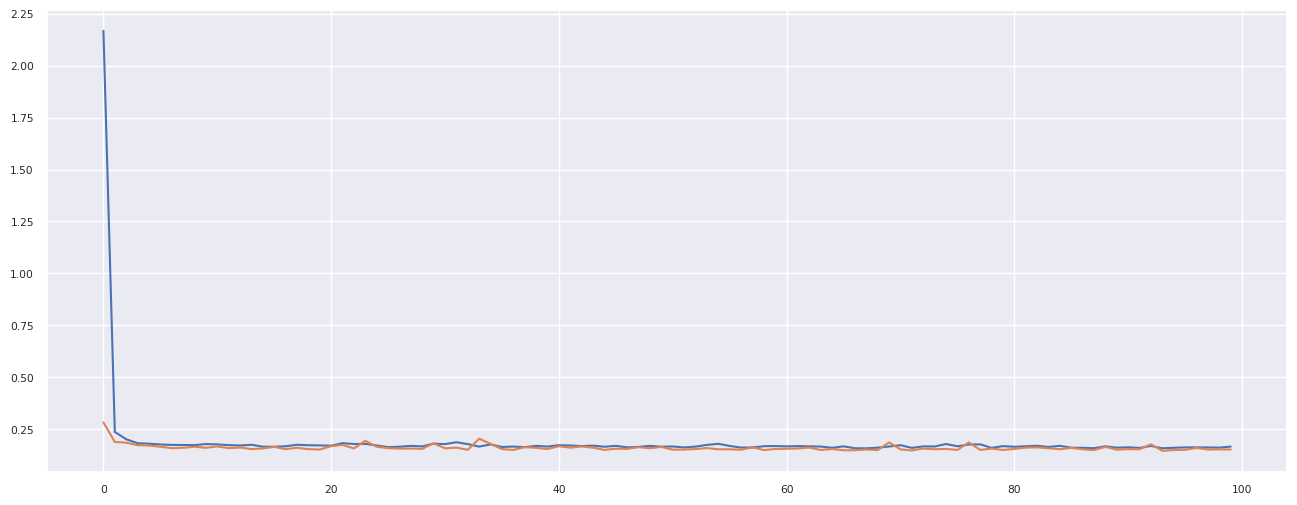

In [15]:
import matplotlib.pyplot as plt

train_loss = [train_loss for train_loss, train_metric, valid_loss, valid_metric in trainer.history]
valid_loss = [valid_loss for train_loss, train_metric, valid_loss, valid_metric in trainer.history]
train_acc = [train_metric for train_loss, train_metric, valid_loss, valid_metric in trainer.history]
valid_acc = [valid_metric for train_loss, train_metric, valid_loss, valid_metric in trainer.history]

plt.plot(range(len(train_loss)), train_loss)
plt.plot(range(len(valid_loss)), valid_loss)
# plt.plot(range(len(train_acc)), train_acc)
# plt.plot(range(len(valid_acc)), valid_acc)

#### Making predictions

In [16]:
df_eval = pd.read_csv("./data/test_data.csv")
df_eval
preprocessed_eval = df_eval.copy()
preprocessed_eval["TimeToBusStop"] = preprocessed_eval["TimeToBusStop"].apply(timestr_to_number)
preprocessed_eval["TimeToSubway"] = preprocessed_eval["TimeToSubway"].apply(timestr_to_number)

preprocessed_eval["HeatingType"].apply(lambda x: int(x == "central_heating"))
preprocessed_eval["AptManageType"].apply(lambda x: int(x == "management_in_trust"))

cat_cols = ["HallwayType", "SubwayStation"]
categorical_eval = pd.get_dummies(preprocessed_eval[cat_cols])
categorical_eval["HeatingType"] = preprocessed_eval["HeatingType"].apply(lambda x: int(x == "central_heating"))
categorical_eval["AptManageType"] = preprocessed_eval["AptManageType"].apply(lambda x: int(x == "management_in_trust"))
numerical_eval = preprocessed_eval.drop(cat_cols, axis=1)
numerical_eval = numerical_eval.drop(["HeatingType", "AptManageType"], axis=1)


for col_name in numerical_eval.columns:
    numerical_eval[col_name] = (numerical_eval[col_name] - mean_value[col_name]) / std_value[col_name]

categorical_eval = torch.tensor(categorical_eval.values).to(trainer.device).float()
numerical_eval = torch.tensor(numerical_eval.values).to(trainer.device).float()

preds = model(numerical_eval, categorical_eval)
preds = preds * std_value["SalePrice"] + mean_value["SalePrice"]

for i in range(len(preds)):
    if preds[i] <= 140000:
        preds[i] = 0
    elif preds[i] <= 310000:
        preds[i] = 1
    else:
        preds[i] = 2


preds = torch.Tensor.cpu(preds).detach().numpy()
tmp = pd.DataFrame(preds)
tmp.to_csv("predictions.csv", index=False, header=False)

preds

array([[1.],
       [2.],
       [2.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)